In [1]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_class.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,Smoker,Snorer,Illness,OSA,BMI
0,P0002,1,29.6,119,174,56,48.0,5,4,2,Mild,39.305060
1,P0004,1,19.7,78,168,39,42.0,2,4,2,Mild,27.636054
2,P0005,1,9.0,80,173,32,40.0,2,4,2,Healthy,26.729927
3,P0006,1,2.0,109,190,32,42.0,2,4,2,Healthy,30.193906
4,P0007,1,34.0,86,169,39,42.0,2,4,2,Severe,30.110991


In [2]:
df = df.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
df.head()

,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI
0,P0002,1,119,174,56,48.0,Mild,39.305060
1,P0004,1,78,168,39,42.0,Mild,27.636054
2,P0005,1,80,173,32,40.0,Healthy,26.729927
3,P0006,1,109,190,32,42.0,Healthy,30.193906
4,P0007,1,86,169,39,42.0,Severe,30.110991


In [3]:
#Index transformation--> NO HACE FALTA (?)wtf
#LABEL ENCODING
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['OSA_label']=le.fit_transform(df['OSA'])
df.head()

#ONEHOT creo que no vale para target value
enc = preprocessing.OneHotEncoder()
# passing OSA cats column (label encoded values of bridge_types)
OSA_oneHot = pd.DataFrame(enc.fit_transform(df[['OSA']]).toarray())
# merge with main df on key values
df = df.join(OSA_oneHot)

In [4]:
df.head()

,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI,OSA_label,0,1,2
0,P0002,1,119,174,56,48.0,Mild,39.305060,1,0.0,1.0,0.0
1,P0004,1,78,168,39,42.0,Mild,27.636054,1,0.0,1.0,0.0
2,P0005,1,80,173,32,40.0,Healthy,26.729927,0,1.0,0.0,0.0
3,P0006,1,109,190,32,42.0,Healthy,30.193906,0,1.0,0.0,0.0
4,P0007,1,86,169,39,42.0,Severe,30.110991,2,0.0,0.0,1.0


In [5]:
df.set_index('Patient', inplace=True)

In [6]:
df.head()

,Gender,Weight,Height,Age,Cervical,OSA,BMI,OSA_label,0,1,2
Patient,,,,,,,,,,,
P0002,1,119,174,56,48.0,Mild,39.305060,1,0.0,1.0,0.0
P0004,1,78,168,39,42.0,Mild,27.636054,1,0.0,1.0,0.0
P0005,1,80,173,32,40.0,Healthy,26.729927,0,1.0,0.0,0.0
P0006,1,109,190,32,42.0,Healthy,30.193906,0,1.0,0.0,0.0
P0007,1,86,169,39,42.0,Severe,30.110991,2,0.0,0.0,1.0


In [7]:
#features 
predictors = ['Gender','Weight', 'Height', 'Age', 'Cervical', 'BMI']
#no encoded
x = df[predictors].values
y = df['OSA'].values

#encoded
x_enc = df[predictors].values
y_enc = df['OSA_label'].values

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
plt.scatter(x_2[:,0], x_2[:,1], c=y_2)
plt.show()

# FUNCIONES PARA VISUALIZAR

In [10]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
outcomes = ['Healthy', 'Mild', 'Severe']

# Logistic regression 
### Grid search

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### grid search with splitted data ? no tiene sentido hacer esto diria yo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg_1 = LogisticRegression()
logreg_1_cv = GridSearchCV(logreg_1,param_grid,cv = 10)
logreg_1_cv.fit(x_train,y_train)

In [ ]:
print("tuned hyperparameters: (best parameters): ", logreg_1_cv.best_params_)
print("accuracy: ", logreg_1_cv.best_score_)

### grid search with  NO splitted data

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

#not encoded target (x,y)
logreg_2 = LogisticRegression()
logreg_2_cv = GridSearchCV(logreg_2,param_grid,cv = 10)
logreg_2_cv.fit(x,y)
print("tuned hyperparameters 1: (best parameters): ", logreg_2_cv.best_params_)
print("accuracy: ", logreg_2_cv.best_score_)

#encoded target(x_enc, y_enc)
logreg_2_2 = LogisticRegression()
logreg_2_2cv = GridSearchCV(logreg_2_2,param_grid,cv = 10)
logreg_2_2cv.fit(x_enc,y_enc)

print("tuned hyperparameters 2: (best parameters): ", logreg_2_2cv.best_params_)
print("accuracy: ", logreg_2_2cv.best_score_)

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

tuned hyperparameters 1: (best parameters):  {'C': 100.0, 'penalty': 'l2'}
accuracy:  0.505530753968254


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
 

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

tuned hyperparameters 2: (best parameters):  {'C': 100.0, 'penalty': 'l2'}
accuracy:  0.505530753968254


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
df['OSA'].dtypes

### kfold (mucho lio)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import metrics

k = 5
kf = KFold(n_splits=k)
precisions = []
i = 0
accuracy_global = []
f1_global = []

for train, test in kf.split(x_enc):
    i+=1
    x_train, x_test = x_enc[train], x_enc[test]
    y_train, y_test = y_enc[train], y_enc[test]
    model = LogisticRegression(C=10, penalty='l2').fit(x_train,y_train)
    y_out = model.predict(x_test)
    
    accuracy = metrics.accuracy_score(y_test, y_out)
    f1_score = metrics.f1_score(y_test, y_out, average="weighted")
   
    accuracy_global.append(accuracy)
    f1_global.append(f1_score)
    #print(metrics.confusion_matrix(y_test, y_out))
    print(metrics.classification_report(y_test, y_out))
  
    #PLOT CONFUSION MATRIX
    # Not normalized
    cm = metrics.confusion_matrix(y_test, y_out)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm, outcomes)

    print("Iteration {}:accuracy={:.4f} f1={:.4f}".format(i, accuracy, f1_score))
print("Global: accuracy={:.4f} f1={:.4f}\n".format(np.average(accuracy_global), np.average(f1_global)))



### cross_val

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Accuracy for logistic regression:  0.49133858267716535
Recall for logistic regression:  0.49133858267716535
Precision for logistic regression:  0.4836611121101274
f1 for logistic regression:  0.4805497843308009
Accuracy 2 for logistic regression:  0.49133858267716535
f1 2 for logistic regression:  0.4824459728335188
Confusion matrix, without normalization
[[164  63  15]
 [ 92  92  44]
 [ 40  69  56]]


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'report_ref' is not defined

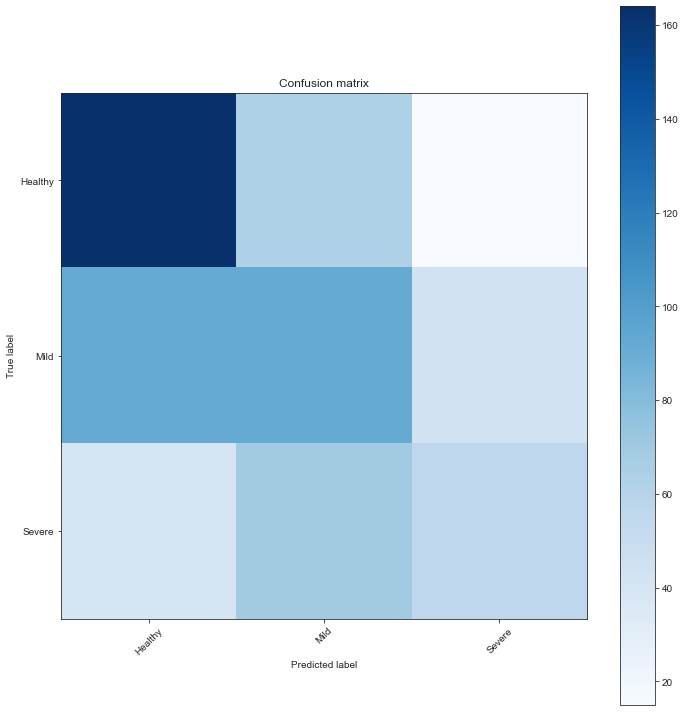

In [22]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict

log_reg_1 = LogisticRegression(C = 100, penalty='l2')
#Not encoded
#accuracy_1 = cross_val_score(log_reg_1, x, y, cv = 5)
#print(accuracy_1)

accuracy_reg = cross_val_score(log_reg_1, x_enc, y_enc, cv = 5)

#forma: no util: mejor report
recall_reg = cross_val_score(log_reg_1, x_enc, y_enc, cv = 5, scoring='recall_weighted')
precision_reg = cross_val_score(log_reg_1, x_enc, y_enc, cv = 5, scoring='precision_weighted')
f1_reg = cross_val_score(log_reg_1, x_enc, y_enc, cv = 5, scoring='f1_weighted')
print("Accuracy for logistic regression: ", np.average(accuracy_reg))
print("Recall for logistic regression: ", np.average(recall_reg))
print("Precision for logistic regression: ", np.average(precision_reg))
print("f1 for logistic regression: ", np.average(f1_reg))

y_out = cross_val_predict(log_reg_1, x_enc, y_enc, cv=5)

#forma 2: no util tampoco. Mejor report
accuracy = metrics.accuracy_score(y_enc, y_out)
f1_score = metrics.f1_score(y_enc, y_out, average="weighted")
print("Accuracy 2 for logistic regression: ", accuracy)
print("f1 2 for logistic regression: ", f1_score)


### PLOT CONFUSION MATRIX ###
# Not normalized
cm = metrics.confusion_matrix(y_enc, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)




#Report buena opcion, te saca todo
report_reg=metrics.classification_report(y_enc, y_out)
print(report_ref)
roc_auc_reg = cross_val_score(log_reg_1, x_enc, y_enc, cv = 5, scoring='roc_auc_ovr')
print("Area under roc for logistic regresion", roc_auc_reg)

#ROC plot for multiclass problem mas complex


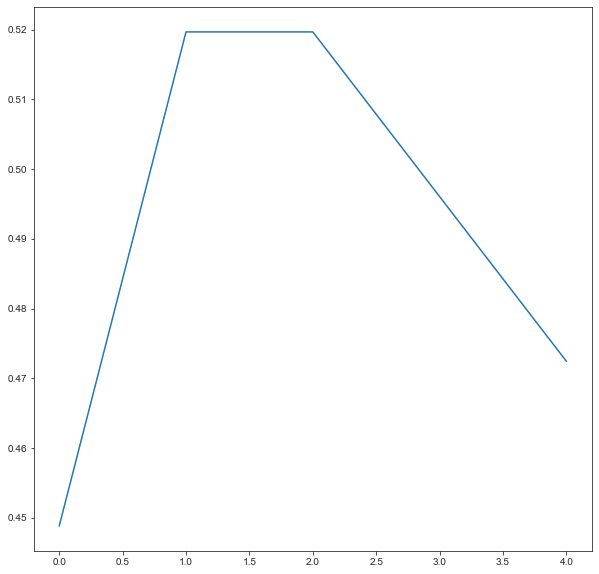

In [16]:
plt.plot(accuracy_reg)

# KNN

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" :np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv = 10)
knn_cv.fit(x_enc,y_enc)

print("tuned hyperparameters: (best parameters): ", knn_cv.best_params_)
print("accuracy: ", knn_cv.best_score_)

tuned hyperparameters: (best parameters):  {'n_neighbors': 41}
accuracy:  0.5166666666666667


Average accuracy of knn: 0.4929133858267717
Confusion matrix, without normalization
[[171  58  13]
 [ 90 104  34]
 [ 44  83  38]]
              precision    recall  f1-score   support

           0       0.56      0.71      0.63       242
           1       0.42      0.46      0.44       228
           2       0.45      0.23      0.30       165

    accuracy                           0.49       635
   macro avg       0.48      0.46      0.46       635
weighted avg       0.48      0.49      0.48       635

Area under roc for logistic regresion [0.68 0.69 0.64 0.74 0.63]


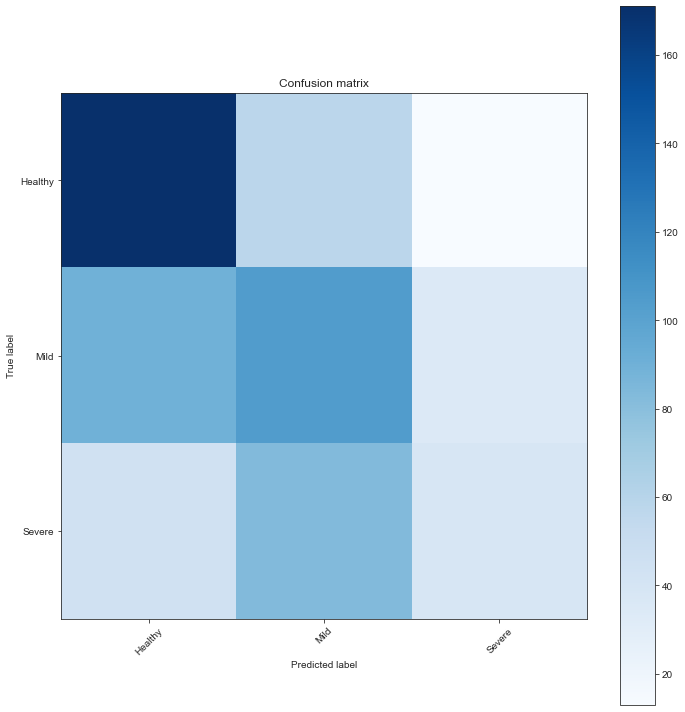

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

knn = KNeighborsClassifier(n_neighbors=41)
accuracy_knn = cross_val_score(knn, x_enc, y_enc, cv=5, scoring='accuracy')
y_out = cross_val_predict(knn, x_enc, y_enc, cv=5)
print('Average accuracy of knn:', np.average(accuracy_knn))
#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y_enc, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

#Report buena opcion, te saca todo
report_knn=metrics.classification_report(y_enc, y_out)
print(report_knn)
roc_auc_knn = cross_val_score(knn, x_enc, y_enc, cv = 5, scoring='roc_auc_ovr')
print("Area under roc for logistic regresion", roc_auc_knn)



# SVM

Average accuracy of svm: 0.5023622047244094
Confusion matrix, without normalization
[[176  62   4]
 [ 95 127   6]
 [ 50  99  16]]
              precision    recall  f1-score   support

           0       0.55      0.73      0.63       242
           1       0.44      0.56      0.49       228
           2       0.62      0.10      0.17       165

    accuracy                           0.50       635
   macro avg       0.53      0.46      0.43       635
weighted avg       0.53      0.50      0.46       635



AttributeError: predict_proba is not available when  probability=False

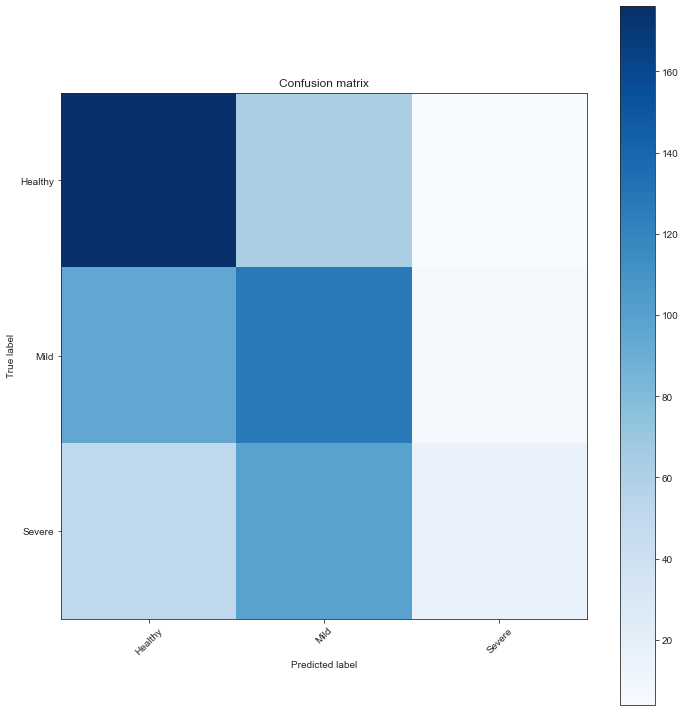

In [31]:
from sklearn.svm import SVC
svm = SVC()
accuracy_svm = cross_val_score(svm, x_enc, y_enc, cv=5, scoring='accuracy')
print('Average accuracy of svm:', np.average(accuracy_svm))
y_out = cross_val_predict(svm, x_enc, y_enc, cv=5)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y_enc, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

#Report 
report_svm = metrics.classification_report(y_enc, y_out)
print(report_svm)
roc_auc_svm = cross_val_score(svm, x_enc, y_enc, cv = 5, scoring='roc_auc_ovr')
print("Area under roc for logistic regresion", roc_auc_svm)

